In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
sns.set_context("talk")

In [2]:
def wise_append(original_list, temp_list):
    if len(temp_list) == 0:
        return np.append(original_list, 0)
    else:
        return np.append(original_list, temp_list[0])
    

def expand_df(df):
    #takes a df with quads as index, and one 'R2E count' column and one 'R6E count' columns
    #return a expand it to R3,R4, and R5 using the given index as reference.
    R3E_count_6rich2low = []
    R4E_count_6rich2low = []
    R5E_count_6rich2low = []

    for i in df.index:
        R3E_temp_6rich2low = R3E_frequency.query("Quadrumer == @i")['Weighted frequency']
        R4E_temp_6rich2low = R4E_frequency.query("Quadrumer == @i")['Weighted frequency']
        R5E_temp_6rich2low = R5E_frequency.query("Quadrumer == @i")['Weighted frequency']
    
        R3E_count_6rich2low = wise_append(R3E_count_6rich2low,R3E_temp_6rich2low)
        R4E_count_6rich2low = wise_append(R4E_count_6rich2low,R4E_temp_6rich2low)
        R5E_count_6rich2low = wise_append(R5E_count_6rich2low,R5E_temp_6rich2low)
    
    return pd.DataFrame({'R2E':df['R2E count'],
                                        'R3E':R3E_count_6rich2low,
                                        'R4E':R4E_count_6rich2low,
                                        'R5E':R5E_count_6rich2low,
                                        'R6E':df['R6E count'],
                                       })

def expand_df_ctrl(df):
    #takes a df with quads as index, and one 'R2E count' column and one 'R6E count' columns
    #return a expand it to R3,R4, and R5 using the given index as reference.
    R3C_count_6rich2low = []
    R4C_count_6rich2low = []
    R5C_count_6rich2low = []

    for i in df.index:
        R3C_temp_6rich2low = R3C_frequency.query("Quadrumer == @i")['Weighted frequency']
        R4C_temp_6rich2low = R4C_frequency.query("Quadrumer == @i")['Weighted frequency']
        R5C_temp_6rich2low = R5C_frequency.query("Quadrumer == @i")['Weighted frequency']
    
        R3C_count_6rich2low = wise_append(R3C_count_6rich2low,R3C_temp_6rich2low)
        R4C_count_6rich2low = wise_append(R4C_count_6rich2low,R4C_temp_6rich2low)
        R5C_count_6rich2low = wise_append(R5C_count_6rich2low,R5C_temp_6rich2low)
    
    return pd.DataFrame({'R2C':df['R2C count'],
                                        'R3C':R3C_count_6rich2low,
                                        'R4C':R4C_count_6rich2low,
                                        'R5C':R5C_count_6rich2low,
                                        'R6C':df['R6C count'],
                                       })

**Import processed data:**

In [3]:
repo_url = 'https://raw.githubusercontent.com/Xiaoqi-Sun/aptamer_scoring/main/'


# NPY - trimer

R4_full_table_trimer = pd.read_csv(repo_url+'NPY%20processed%20data/R4_full_table_trimer.csv',index_col=0)
R4_frequency_trimer = pd.read_csv(repo_url+'NPY%20processed%20data/R4_frequency_trimer.csv',index_col=0)
R6_full_table_trimer = pd.read_csv(repo_url+'NPY%20processed%20data/R6_full_table_trimer.csv',index_col=0)
R6_frequency_trimer = pd.read_csv(repo_url+'NPY%20processed%20data/R6_frequency_trimer.csv',index_col=0)


# NPY - quadrumer
R4_full_table_quadrumer = pd.read_csv(repo_url+'NPY%20processed%20data/R4_full_table_quadrumer.csv',index_col=0)
R4_frequency_quadrumer = pd.read_csv(repo_url+'NPY%20processed%20data/R4_frequency_quadrumer.csv',index_col=0)
R6_full_table_quadrumer =  pd.read_csv(repo_url+'NPY%20processed%20data/R6_full_table_quadrumer.csv',index_col=0)
R6_frequency_quadrumer = pd.read_csv(repo_url+'NPY%20processed%20data/R6_frequency_quadrumer.csv',index_col=0)

## Quadrumer Frequency Distribution 

In [17]:
R6

NameError: name 'R6' is not defined

In [16]:
R6_frequency_quadrumer

,Quadrumer,Count
0,AAAA,77
1,AAAC,32
2,AAAG,141
3,AACA,48
4,AACG,65
...,...,...
245,TTGT,191
246,TTTA,114
247,TTTC,112
248,TTTG,102


In [4]:
R6_top10_quad = R6_frequency_quadrumer.sort_values('Count',ascending=False).head(10)
R6_top10_quad

,Quadrumer,Count
110,CTAT,214
53,ATCT,212
221,TGAT,210
33,AGAT,198
52,ATCG,196
194,TAGA,195
245,TTGT,191
232,TGTG,185
130,GAGA,184
59,ATTC,183


In [5]:
R4_top10_quad = R4_frequency_quadrumer.sort_values('Count',ascending=False).head(10)
R4_top10_quad

,Quadrumer,Count
177,GTAT,253
106,CGTA,243
239,TTAC,232
26,ACGG,220
102,CGGA,210
231,TGGC,202
205,TATT,191
248,TTGG,189
202,TATA,187
217,TCGT,186


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


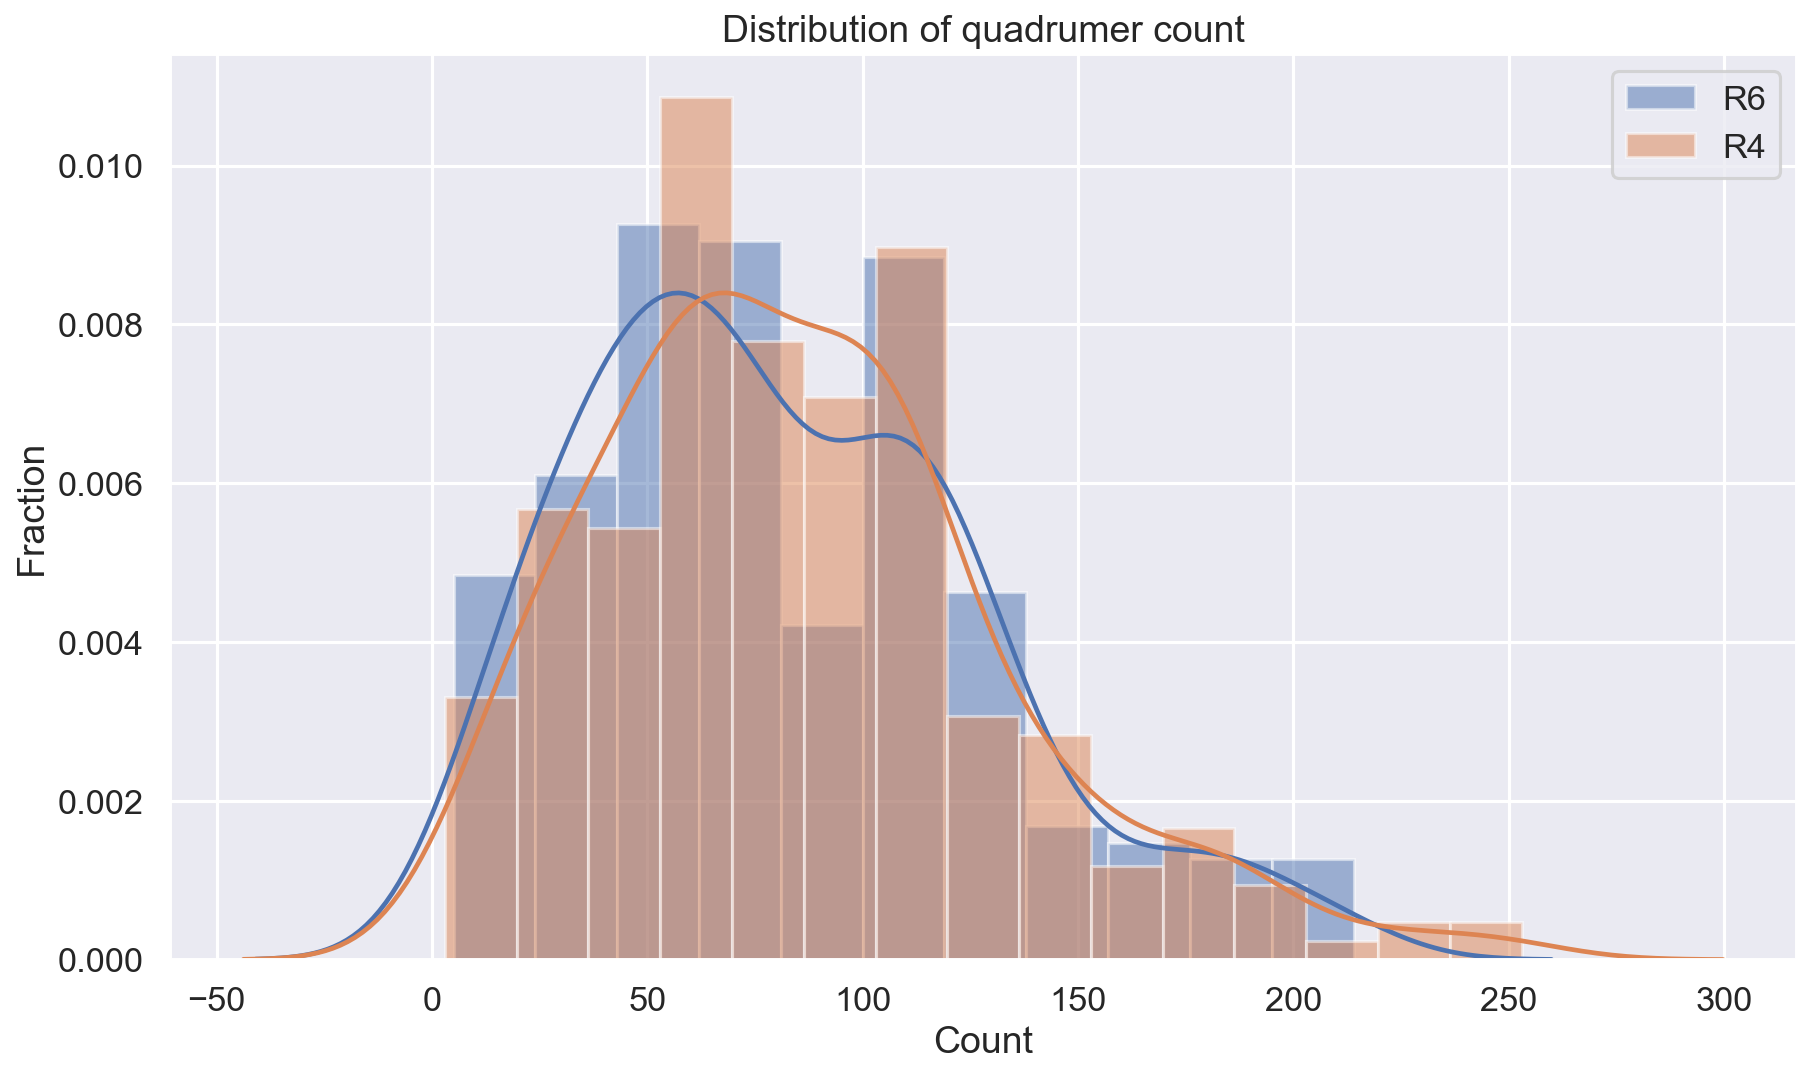

In [6]:
sns.distplot(R6_frequency_quadrumer['Count'],kde=True,label='R6',hist_kws={"alpha": 0.5})
sns.distplot(R4_frequency_quadrumer['Count'],kde=True,label='R4',hist_kws={"alpha": 0.5})

plt.ylabel('Fraction')
plt.title('Distribution of quadrumer count')
plt.legend();

## Trimer Frequency Distribution 

In [7]:
R6_top10_tri = R6_frequency_trimer.sort_values('Count',ascending=False).head(10)
R6_top10_tri

,Trimer,Count
8,AGA,592
35,GAT,588
15,ATT,579
56,TGA,542
51,TAT,532
34,GAG,529
46,GTG,501
54,TCG,496
55,TCT,490
59,TGT,489


In [8]:
R4_top10_tri = R4_frequency_trimer.sort_values('Count',ascending=False).head(10)
R4_top10_tri

,Trimer,Count
51,TAT,642
40,GGA,599
63,TTT,562
60,TTA,561
44,GTA,560
15,ATT,556
42,GGG,547
58,TGG,532
62,TTG,530
47,GTT,511


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


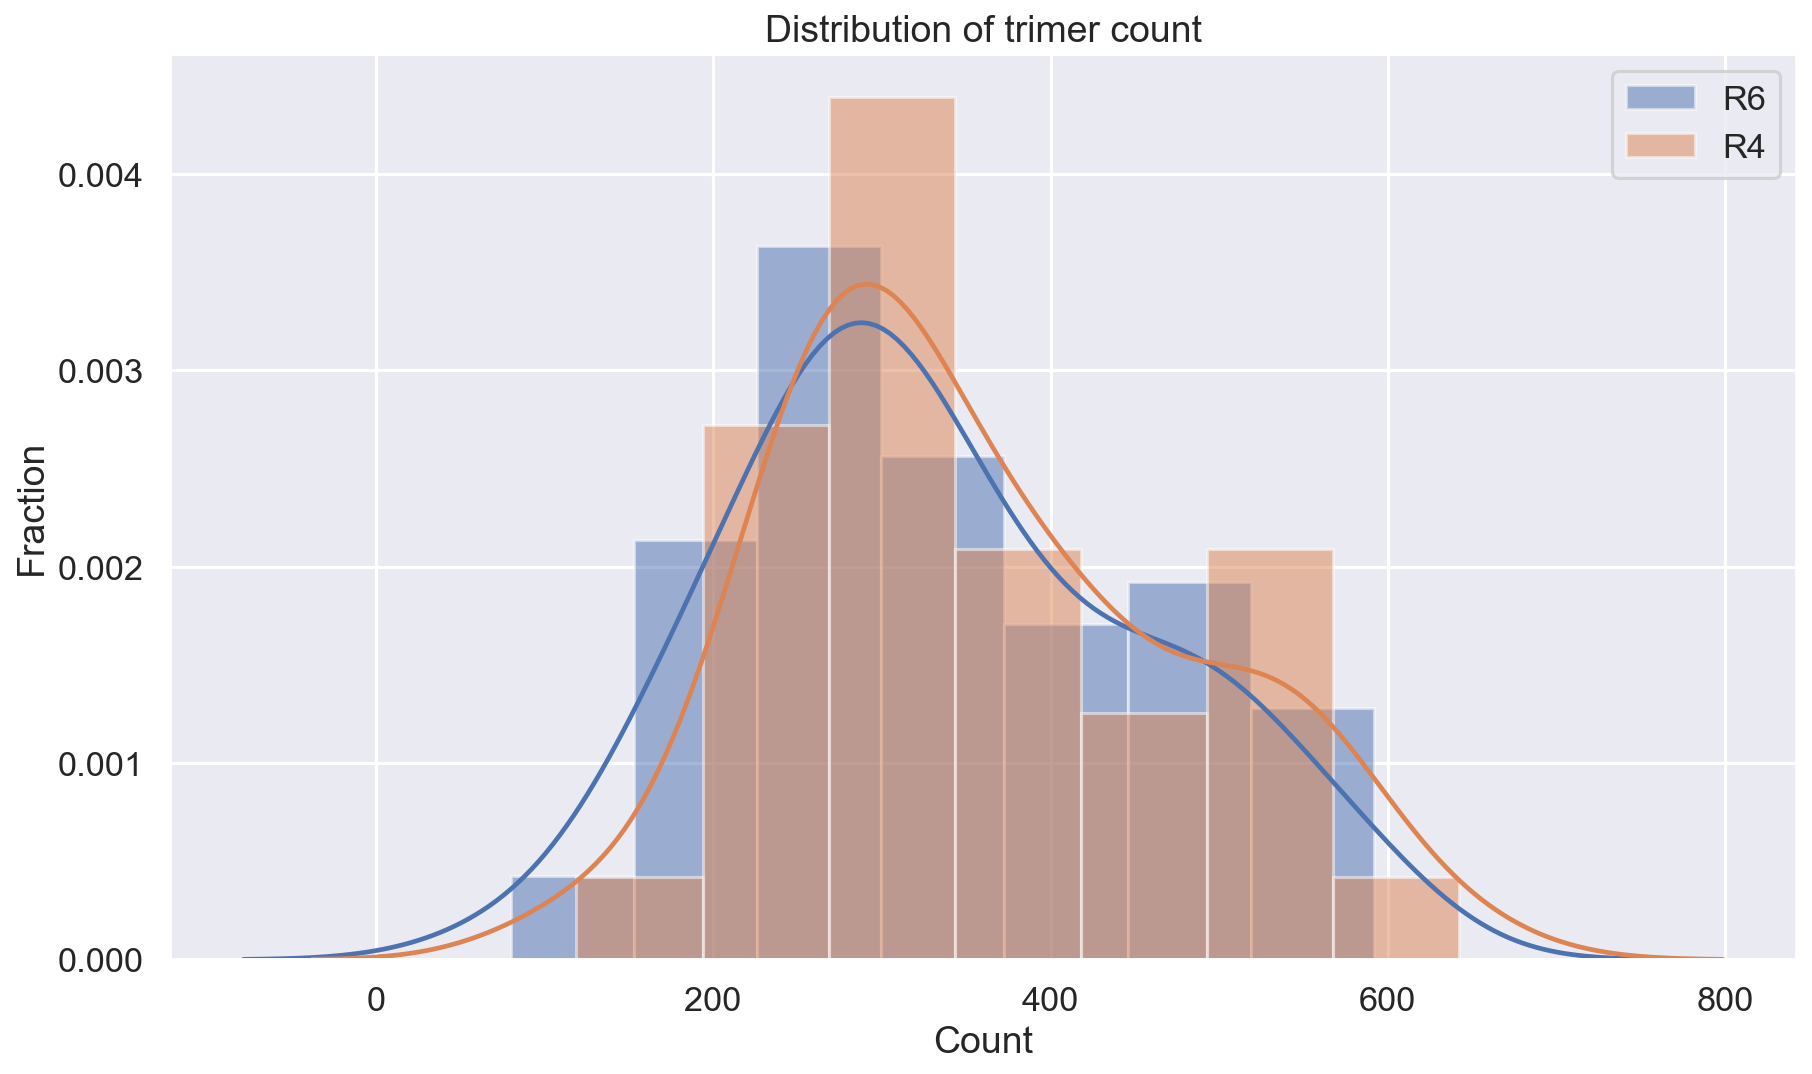

In [9]:
sns.distplot(R6_frequency_trimer['Count'],kde=True,label='R6',hist_kws={"alpha": 0.5})
sns.distplot(R4_frequency_trimer['Count'],kde=True,label='R4',hist_kws={"alpha": 0.5})

plt.ylabel('Fraction')
plt.title('Distribution of trimer count')
plt.legend();

## Quadrumer Position Distributions

In [10]:
R6_full_table_quadrumer[R6_full_table_quadrumer['Quadrumer'].isin(R6_top10_quad['Quadrumer'])]

,Position,Quadrumer
24,25,TAGA
50,14,TGAT
59,23,ATTC
63,27,TTGT
71,35,TGAT
...,...,...
1054,20,TAGA
1056,22,GAGA
1058,24,GAGA
1059,25,AGAT


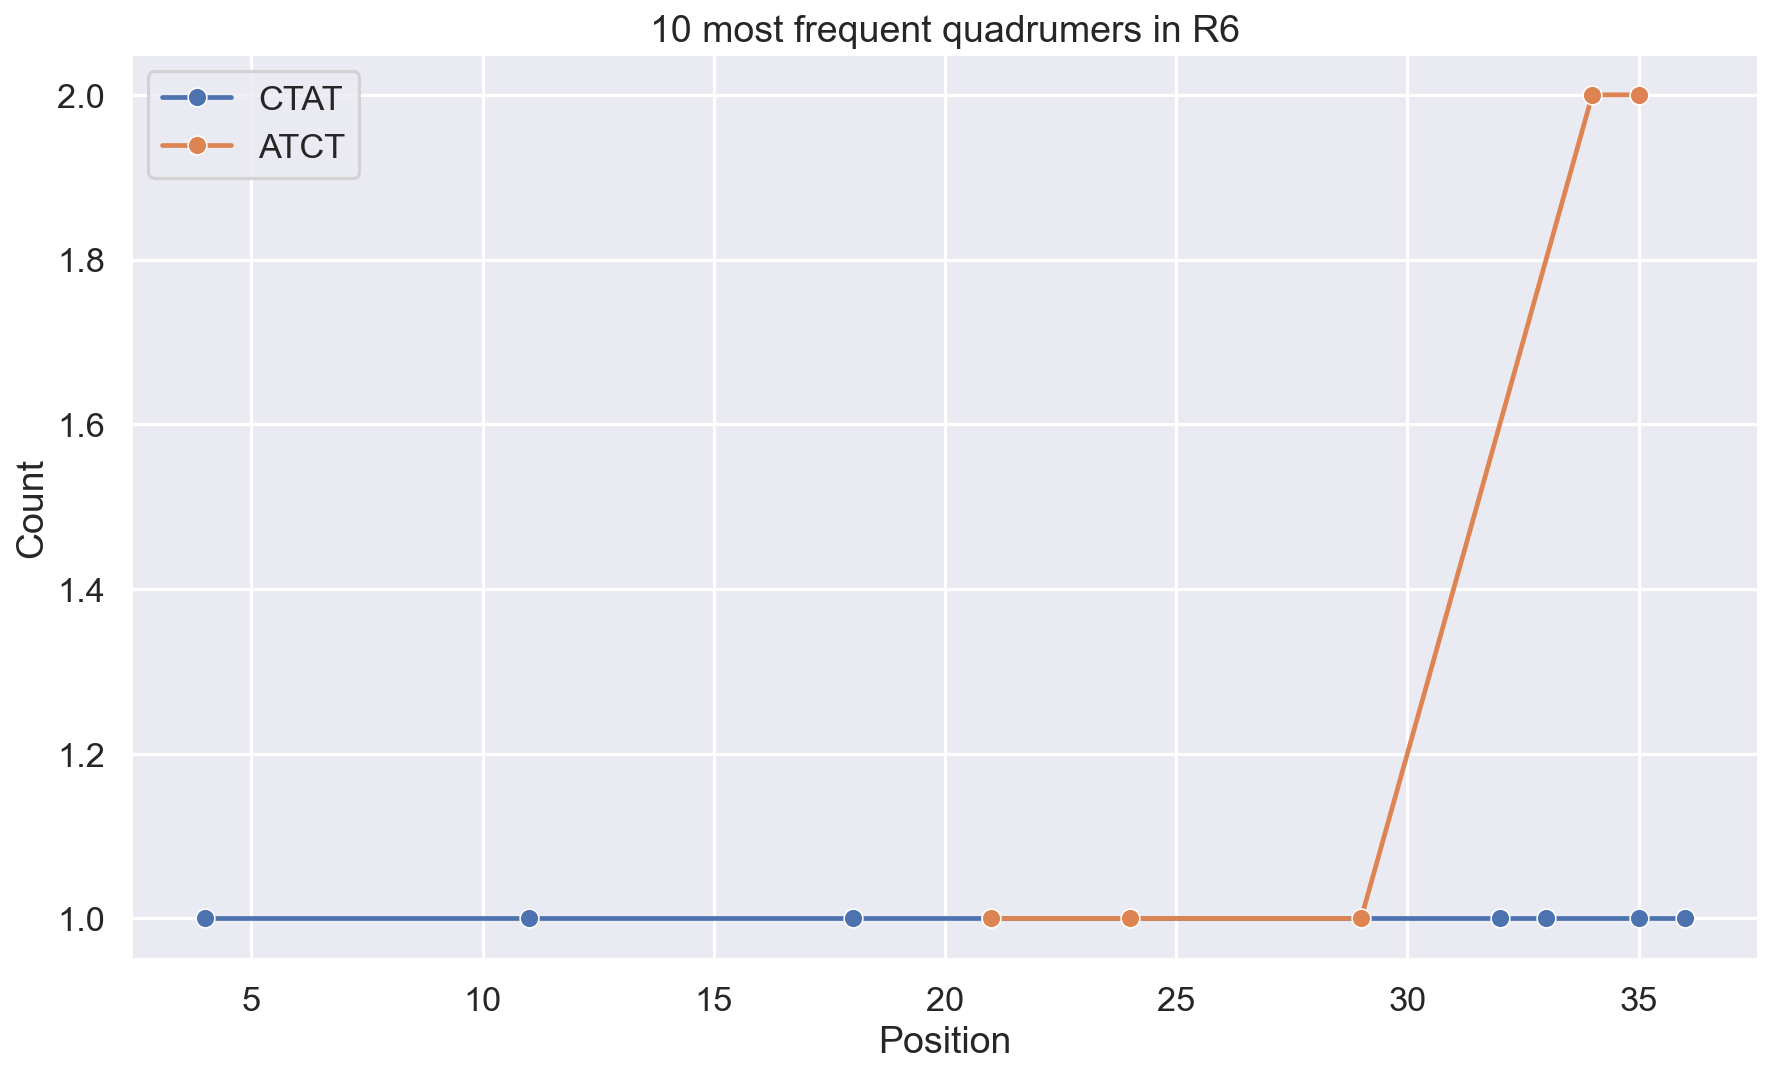

In [18]:
#position of the to 10 most frequent quadrumer in R6E
for i in R6_top10_quad['Quadrumer'][0:2]:
    temp = R6_full_table_quadrumer[R6_full_table_quadrumer['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R6');

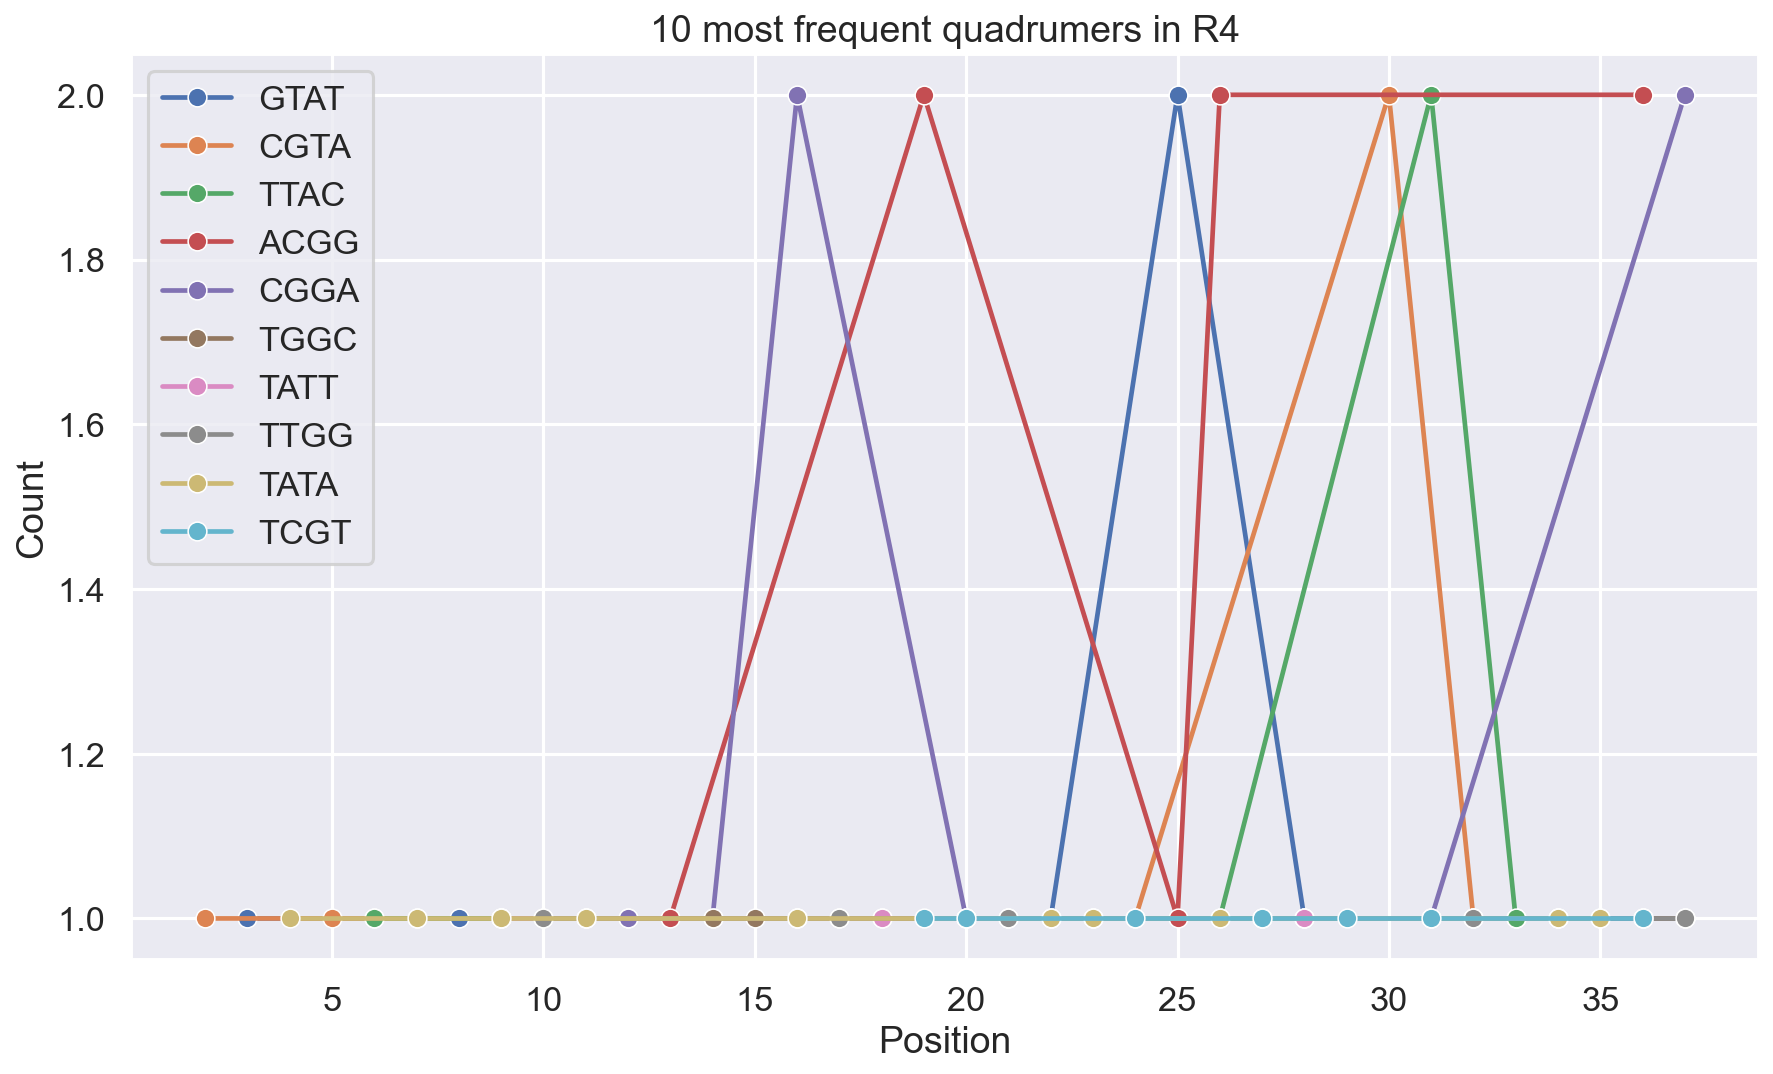

In [12]:
#position of the to 10 most frequent quadrumer in R6E
for i in R4_top10_quad['Quadrumer']:
    temp = R4_full_table_quadrumer[R4_full_table_quadrumer['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R4');

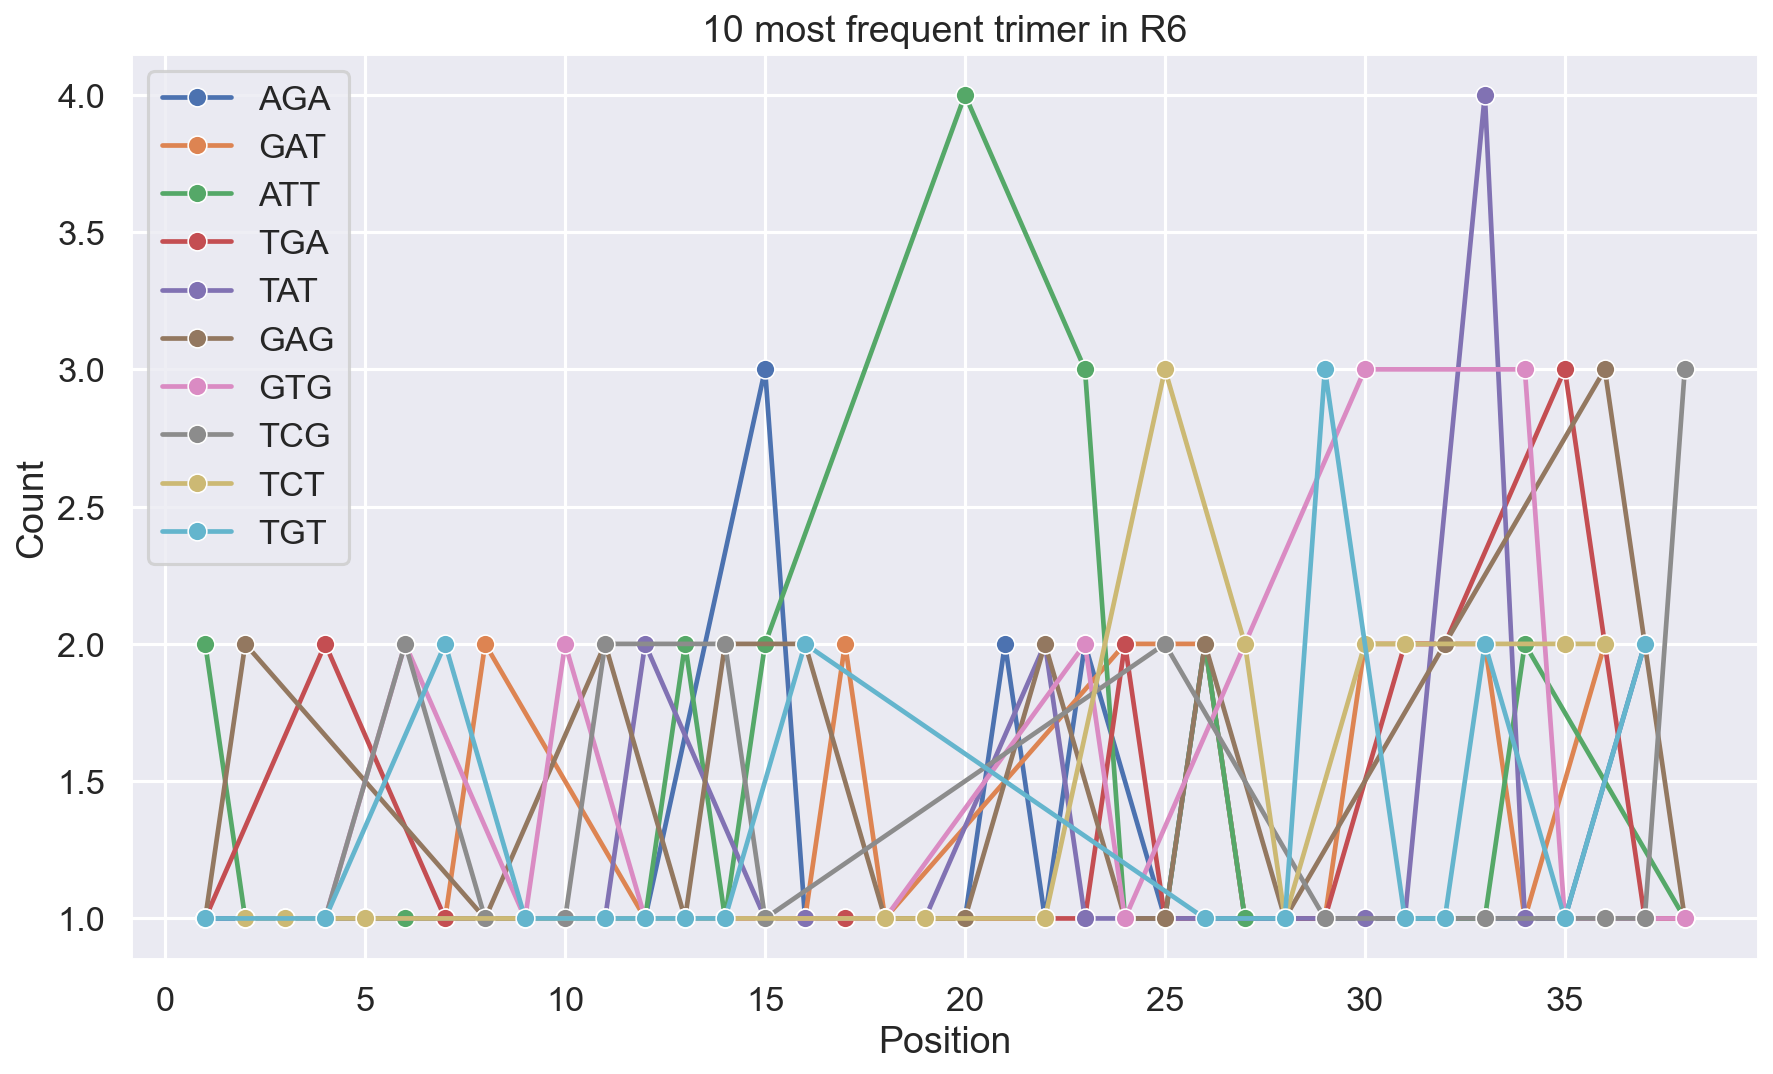

In [13]:
#position of the to 10 most frequent trimer in R6
for i in R6_top10_tri['Trimer']:
    temp = R6_full_table_trimer[R6_full_table_trimer['Trimer']==i].loc[:,["Position","Trimer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent trimer in R6');

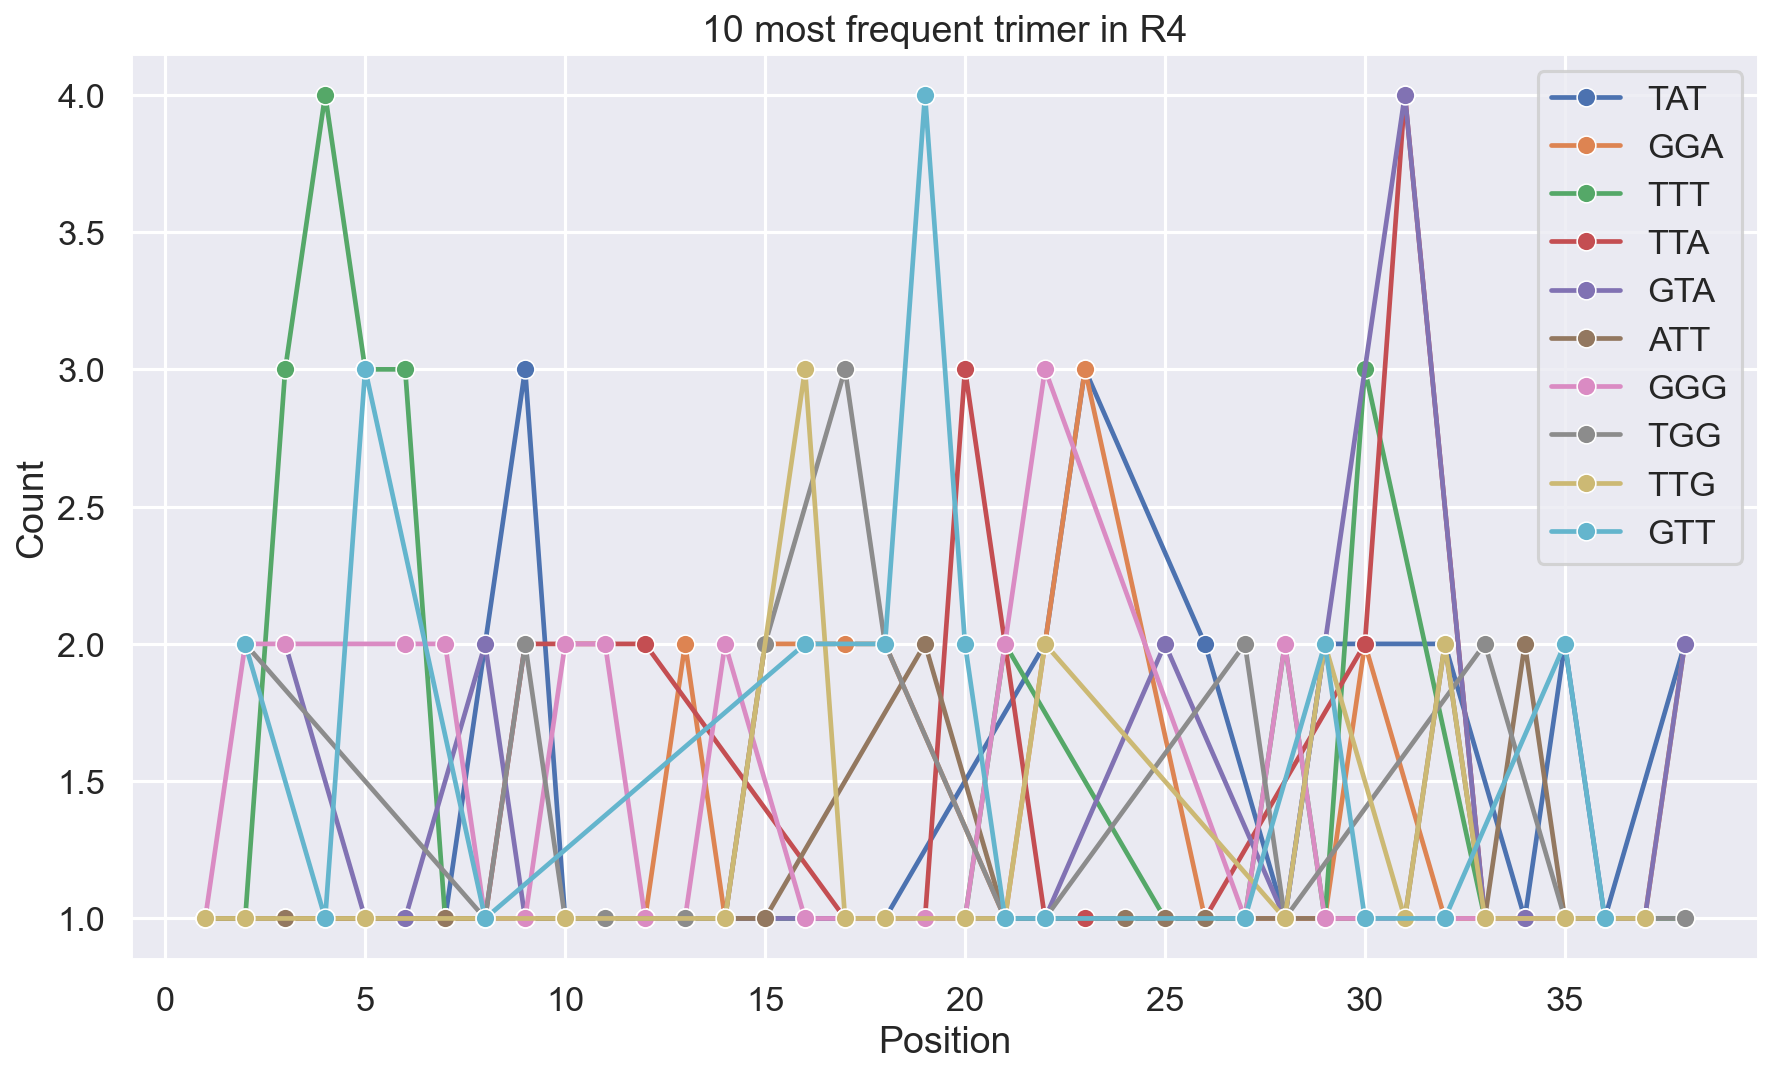

In [14]:
#position of the to 10 most frequent trimer in R6
for i in R4_top10_tri['Trimer']:
    temp = R4_full_table_trimer[R4_full_table_trimer['Trimer']==i].loc[:,["Position","Trimer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent trimer in R4');

## Enrichment through each rounds

 **rich in R2E but low in R6E (positively enrichment)**

In [15]:
#parameters
low_in_R6E = np.percentile(R6E_frequency['Weighted frequency'],20) # les than 5 percentile in R6E, low in R6E
rich_in_R2E = np.percentile(R2E_frequency['Weighted frequency'],80) # more 95 percentile in R2E, rich in R2E

#rich in R2E but low in R6E
R6E_lowfreq = R6E_frequency[R6E_frequency['Weighted frequency'] < low_in_R6E].index
R2E_seq_in_R6Elow = R2E_frequency[R2E_frequency.index.isin(R6E_lowfreq)]
R2E_rich_in_R6Elow = R2E_seq_in_R6Elow[R2E_seq_in_R6Elow['Weighted frequency'] > rich_in_R2E].rename(columns={'Weighted frequency':'R2E count'}).merge(R6E_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R6E count'})
R2E_rich_in_R6Elow_full = expand_df(R2E_rich_in_R6Elow)


NameError: name 'R6E_frequency' is not defined

In [ ]:
sns.set_palette(sns.color_palette("hls", 17))
for i in R2E_rich_in_R6Elow_full.index:
    sns.lineplot(x=R2E_rich_in_R6Elow_full.loc[i].index, y=R2E_rich_in_R6Elow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Negative Enrichment through each round(rich in R2E, low in R6E)');

**rich in R6E but low in R2E (negatively enriched)** 

In [ ]:
low_in_R2E = np.percentile(R2E_frequency['Weighted frequency'],20) # les than 5 percentile in R2E, low in R2E
rich_in_R6E = np.percentile(R6E_frequency['Weighted frequency'],80) # more 95 percentile in R6E, rich in R6E

#rich in R2E but low in R6E
R2E_lowfreq = R2E_frequency[R2E_frequency['Weighted frequency'] < low_in_R2E].index
R6E_seq_in_R2Elow = R6E_frequency[R6E_frequency.index.isin(R2E_lowfreq)]
R6E_rich_in_R2Elow = R6E_seq_in_R2Elow[R6E_seq_in_R2Elow['Weighted frequency'] > rich_in_R6E].rename(columns={'Weighted frequency':'R6E count'}).merge(R2E_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R2E count'})
R6E_rich_in_R2Elow_full = expand_df(R6E_rich_in_R2Elow)

In [ ]:
for i in R6E_rich_in_R2Elow_full.index:
    sns.lineplot(x=R6E_rich_in_R2Elow_full.loc[i].index, y=R6E_rich_in_R2Elow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Positive Enrichment through each round');

 **rich in R2C but low in R6C (positively enrichment)**

In [ ]:
#parameters
low_in_R6C = np.percentile(R6C_frequency['Weighted frequency'],20) # less than 5 percentile in R6C, low in R6C
rich_in_R2C = np.percentile(R2C_frequency['Weighted frequency'],80) # more 95 percentile in R2C, rich in R2C

#rich in R2E but low in R6E
R6C_lowfreq = R6C_frequency[R6C_frequency['Weighted frequency'] < low_in_R6C].index
R2C_seq_in_R6Clow = R2C_frequency[R2C_frequency.index.isin(R6C_lowfreq)]
R2C_rich_in_R6Clow = R2C_seq_in_R6Clow[R2C_seq_in_R6Clow['Weighted frequency'] > rich_in_R2C].rename(columns={'Weighted frequency':'R2C count'}).merge(R6C_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R6C count'})
R2C_rich_in_R6Clow_full = expand_df_ctrl(R2C_rich_in_R6Clow)


In [ ]:
for i in R2C_rich_in_R6Clow_full.index:
    sns.lineplot(x=R2C_rich_in_R6Clow_full.loc[i].index, y=R2C_rich_in_R6Clow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Negative Enrichment through each round(rich in R2C, low in R6C)');

**rich in R6E but low in R2E (negatively enriched)** 

In [ ]:
low_in_R2C = np.percentile(R2C_frequency['Weighted frequency'],20) # les than 5 percentile in R2E, low in R2E
rich_in_R6C = np.percentile(R6C_frequency['Weighted frequency'],80) # more 95 percentile in R6E, rich in R6E

#rich in R2E but low in R6E
R2C_lowfreq = R2C_frequency[R2C_frequency['Weighted frequency'] < low_in_R2C].index
R6C_seq_in_R2Clow = R6C_frequency[R6C_frequency.index.isin(R2C_lowfreq)]
R6C_rich_in_R2Clow = R6C_seq_in_R2Clow[R6C_seq_in_R2Clow['Weighted frequency'] > rich_in_R6C].rename(columns={'Weighted frequency':'R6C count'}).merge(R2C_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R2C count'})
R6C_rich_in_R2Clow_full = expand_df_ctrl(R6C_rich_in_R2Clow)


In [ ]:
for i in R6C_rich_in_R2Clow_full.index:
    sns.lineplot(x=R6C_rich_in_R2Clow_full.loc[i].index, y=R6C_rich_in_R2Clow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Positive Enrichment through each round in control group');

In [ ]:
temp_GGAT = []
temp_GAGG = []

for i in np.arange(2,7):
    exec("temp_GGAT = np.append(temp_GGAT,R{}C_frequency[R{}C_frequency.index =='GGAT']['Weighted frequency'][0])".format(i,i))
    exec("temp_GAGG = np.append(temp_GAGG,R{}C_frequency[R{}C_frequency.index =='GAGG']['Weighted frequency'][0])".format(i,i))

pd.DataFrame(np.row_stack((temp_GGAT,temp_GAGG)),index=['GGAT','GAGG'],columns=['R2C','R3C','R4C','R5C','R6C'])

In [ ]:
# abundant in one but not in the other